# **INSTALAR GRADIO**

In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 701.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.3 MB/s

# **ASIGNAR VALORES A CADA COLOR**

In [2]:
import cv2
import numpy as np
import gradio as gr

# definiciones de rangos de color en HSV
color_ranges = {
    'rojo': ([0, 120, 70], [10, 255, 255]),
    'azul': ([100, 150, 0], [140, 255, 255]),
    'verde': ([40, 40, 40], [80, 255, 255]),
    'amarillo': ([25, 100, 100], [35, 255, 255]),
    'naranja': ([10, 100, 100], [20, 255, 255]),
    'rosa': ([160, 50, 50], [180, 255, 255]),
    'violeta': ([130, 100, 100], [160, 255, 255]),
    'marrón': ([10, 100, 20], [20, 255, 200]),
    'negro': ([0, 0, 0], [180, 255, 50])
}

# valores de desplazamiento para cada color
desplazamientos = {
    'rojo': 3,
    'azul': 5,
    'verde': 2,
    'amarillo': 4,
    'naranja': 2,
    'rosa': 1,
    'violeta': 3,
    'marrón': 4,
    'negro': 5
}

# **FUNCIÓN PARA PROCESAR IMAGEN Y CALCULAR DESPLAZAMIENTO A PARTIR DE COLORES IDENTIFICADOS**

In [3]:


def procesar_imagen(image_path):
    #cargar la imagen
    image = cv2.imread(image_path)
    #convertir la imagen de BGR (Blue, Green, Red) a HSV (Hue, Saturation, Value), que es más adecuado para el procesamiento de color
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # variable para acumular el total de desplazamientos basados en los colores detectados en la imagen.
    total_desplazamiento = 0

    # bucle para detectar colores y calcular el desplazamiento total.
    # este bucle dentro de esta función itera sobre cada color definido, usa máscaras para identificar áreas del color específico
    # y calcula su prevalencia en la imagen. Si el color es detectado más que un umbral mínimo (0.01%), se suma su desplazamiento asociado al total.
    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")

        mask = cv2.inRange(hsv, lower, upper)
        area_color = np.sum(mask > 0)
        area_total = mask.size
        porcentaje_color = (area_color / area_total) * 100

        # Considerar solo los colores con un porcentaje detectado mayor que 0.01
        if porcentaje_color > 0.01:
            total_desplazamiento += desplazamientos[color]
    return total_desplazamiento


# **FUNCIONES PARA CIFRAR Y DESCIFRAR MENSAJES UTILIZANDO CIFRADO CÉSAR**

In [4]:
def cifrar(texto, desplazamiento):
    cifrado = ""
    for char in texto:
        if char.isalpha():  # Asegurarse de que el caracter es una letra
            base = ord('a') if char.islower() else ord('A')
            shift = (ord(char) - base + desplazamiento) % 26 + base
            cifrado += chr(shift)
        else:
            cifrado += char
    return cifrado

def descifrar(texto, desplazamiento):
    # Para descifrar, el desplazamiento debe ser negativo
    return cifrar(texto, -desplazamiento)

def cifrar_con_imagen(texto, image):
    desplazamiento = procesar_imagen(image)
    return cifrar(texto, desplazamiento)

def descifrar_con_imagen(texto, image):
    desplazamiento = procesar_imagen(image)
    return descifrar(texto, desplazamiento)

cifrar y descifrar implementan el cifrado y descifrado de textos. cifrar mueve cada letra del texto un número de posiciones en el alfabeto basado en el desplazamiento, mientras que descifrar simplemente usa un desplazamiento negativo para revertir el proceso.

cifrar_con_imagen y descifrar_con_imagen combinan la detección de color y el cifrado/descifrado. Procesan la imagen para obtener un desplazamiento total y luego cifran o descifran el texto basado en ese desplazamiento.

# **CONFIGURACIÓN DE INTERFAZ GRÁFICA UTILIZANDO GRADIO**

In [5]:
# manejo del modo de operación y llamada a funciones
def main(texto, image, mode):
    if mode == "Cifrar":
        return cifrar_con_imagen(texto, image)
    elif mode == "Descifrar":
        return descifrar_con_imagen(texto, image)
    else:
        return "Modo no válido"

 # configuración de la interfaz de Gradio
iface = gr.Interface(
    fn=main,
    inputs=[
        gr.Textbox(label="Texto"),
        gr.Image(type="filepath", label="Imagen"),
        gr.Radio(choices=["Cifrar", "Descifrar"], label="Modo")
    ],
    outputs=gr.Textbox(label="Resultado"),
    title="Cifrado y Descifrado con Imagen",
    description="Selecciona el modo, sube una imagen y escribe un texto para cifrar o descifrar."
)

# lanzar la interfaz
if __name__ == "__main__":
    iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8ee2e78f082de97803.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **COMPROBACIÓN DE QUE COLORES IDENTIFICADOS SON LOS CORRECTOS**

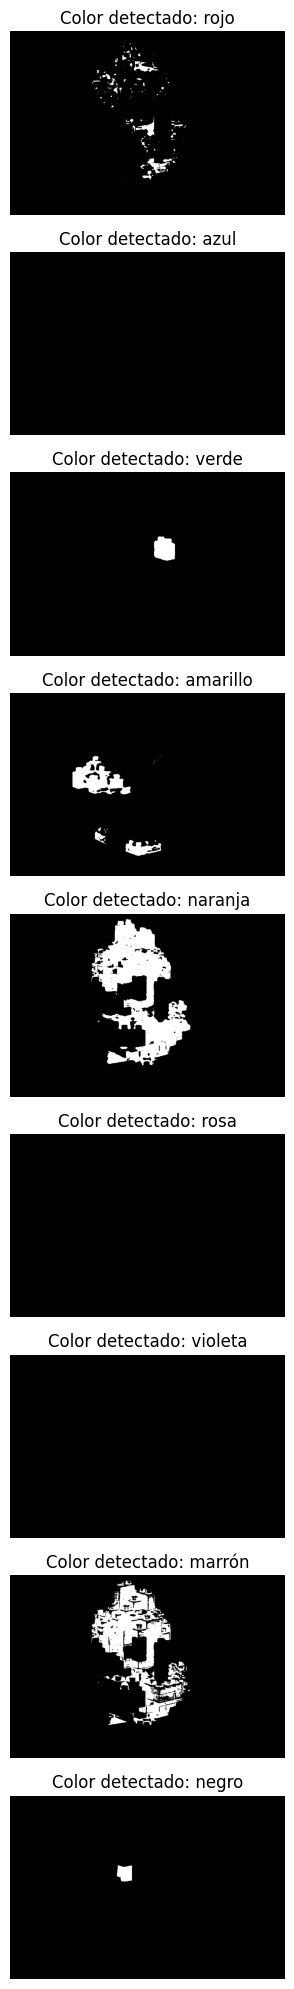

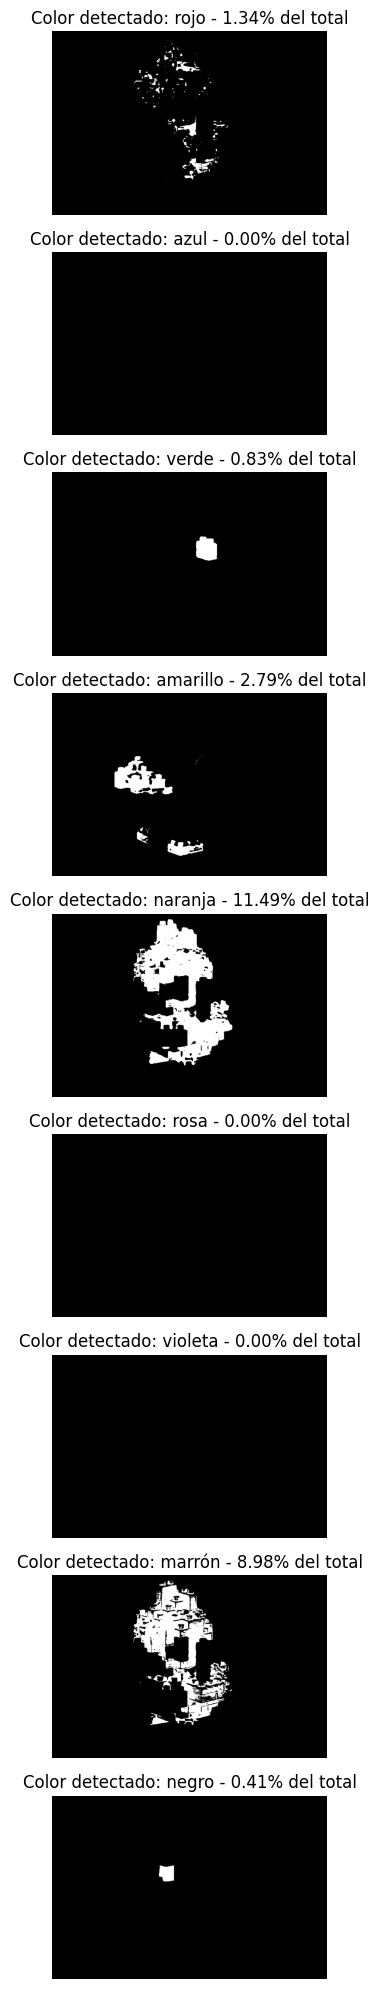

In [6]:
color_ranges = {
    'rojo': ([0, 120, 70], [10, 255, 255]),
    'azul': ([100, 150, 0], [140, 255, 255]),
    'verde': ([40, 40, 40], [80, 255, 255]),
    'amarillo': ([25, 100, 100], [35, 255, 255]),
    'naranja': ([10, 100, 100], [20, 255, 255]),
    'rosa': ([160, 50, 50], [180, 255, 255]),
    'violeta': ([130, 100, 100], [160, 255, 255]),
    'marrón': ([10, 100, 20], [20, 255, 200]),
    'negro': ([0, 0, 0], [180, 255, 50])
}

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('/content/drive/MyDrive/Criptografia/imagen_lego.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

def visualizar_mascaras(hsv, color_ranges):
    fig, axes = plt.subplots(nrows=len(color_ranges), figsize=(10, 20))
    for ax, (color, (lower, upper)) in zip(axes, color_ranges.items()):
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")
        mask = cv2.inRange(hsv, lower, upper)
        ax.imshow(mask, cmap='gray')
        ax.set_title(f"Color detectado: {color}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

visualizar_mascaras(hsv, color_ranges)

def calcular_porcentaje_color(mask):
    area_color = np.sum(mask > 0)
    area_total = mask.size
    return (area_color / area_total) * 100

def visualizar_y_calcular(hsv, color_ranges):
    fig, axes = plt.subplots(nrows=len(color_ranges), figsize=(10, 20))
    for ax, (color, (lower, upper)) in zip(axes, color_ranges.items()):
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")
        mask = cv2.inRange(hsv, lower, upper)
        percentage = calcular_porcentaje_color(mask)
        ax.imshow(mask, cmap='gray')
        ax.set_title(f"Color detectado: {color} - {percentage:.2f}% del total")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

visualizar_y_calcular(hsv, color_ranges)
